In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

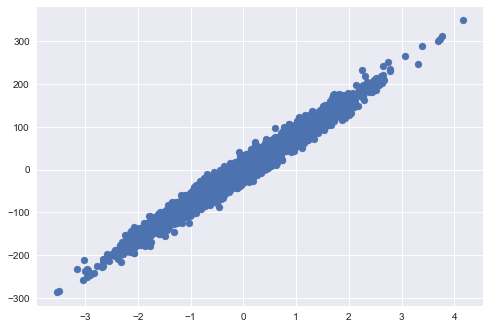

In [83]:
# Load annd filter data
X1 = pd.read_csv('data/Linear_X_Train.csv')
Y1= pd.read_csv('data/Linear_Y_Train.csv')
X = X1.values
Y = Y1.values

#Normalize
u = X.mean()
std = X.std()

X = (X-u)/std


#Visualize
plt.scatter(X, Y)
plt.show()

In [84]:
# Linear Regression Algo

In [85]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    #print('x' ,type(x))
    return y_

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        x = X[i]
        #print("xi",X[i].shape)
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    #print("grad", type(grad))   
    return grad/m

def error(X, Y,theta):
    #print(X[1].shape)
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
        #print('xi',X[i],type(X[i]))
    return total_error/m


def gradientDescent(X,Y,lr = 0.1, max_step = 100):
    error_list = []
    theta_list = []

    theta = np.zeros((2,))
    for i in range(max_step):
        #compute gradient
        grad = gradient(X,Y,theta)
        e = error(X, Y, theta)
        #update dradient
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
        #storing values
        error_list.append(e)
        theta_list.append((theta[0], theta[1]))
    #print(error_list)
    
    return theta, error_list, theta_list 





In [86]:
theta, error_list, theta_list = gradientDescent(X,Y)

In [87]:
theta

array([ 0.6838508 , 79.90361453])

In [88]:
#error_list

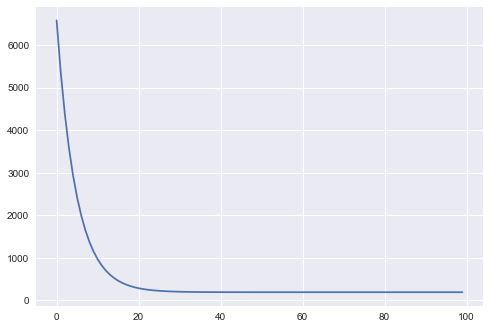

In [89]:
plt.plot(error_list)

In [90]:
#Predicction 
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


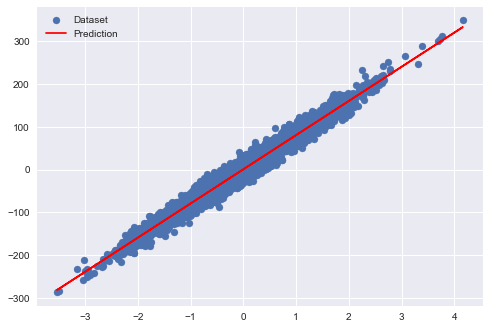

In [91]:
plt.style.use('seaborn')
plt.scatter(X,Y, label="Dataset") 
plt.plot(X, y_, color='red',label="Prediction")
plt.legend()
plt.show()

In [92]:
X_test = pd.read_csv("data/Linear_X_Test.csv")
y_test = hypothesis(X_test, theta)
y_test.shape

(1250, 1)

In [93]:
df = pd.DataFrame(data= y_test, columns=["y"])


In [94]:
df.to_csv('y_prediction.csv', index = False) 

In [95]:
# Accuracy Test Function

def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)

    score = 1 - (num/denom)
    
    return score*100


In [96]:
r2_score(Y, y_)

97.09612226971643

In [97]:
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

In [98]:
# Load annd filter data
#X1 = pd.read_csv('data/Linear_X_Train.csv')
#Y1= pd.read_csv('data/Linear_Y_Train.csv')
#X = X1.values
#Y = Y1.values


In [99]:
# Visualizing Loss Function, gradient descent, Theta Update

T0 = np.arange(-40,40,1)
T1= np.arange(40,120,1)
T0,T1


(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39]),
 array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

In [100]:
T0, T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y - y_)**2)/Y.shape[0]
print(J.shape)

(80, 80)


C:\Users\pranj\AppData\Local\Temp\ipykernel_14060\3382454866.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


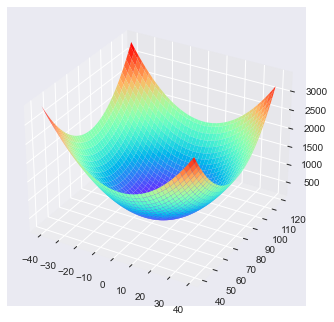

In [101]:
# Visualize loss
    
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1,J, cmap='rainbow')
plt.show()

C:\Users\pranj\AppData\Local\Temp\ipykernel_14060\2266251283.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


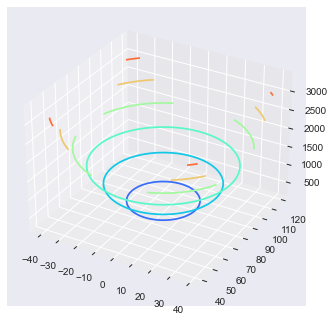

In [102]:
# Visualize loss Contour
plt.style.use('seaborn')
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1,J, cmap='rainbow')
plt.show()

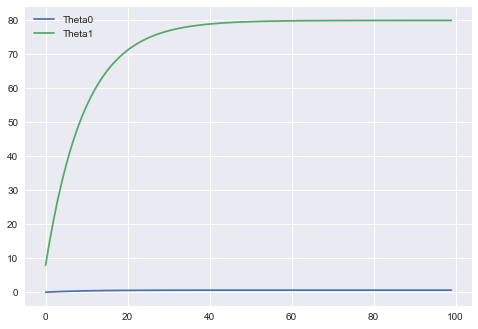

In [103]:
# plot the change in value of theta 

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label="Theta0")
plt.plot(theta_list[:,1], label="Theta1")
plt.legend()
plt.show()

C:\Users\pranj\AppData\Local\Temp\ipykernel_14060\3954242697.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


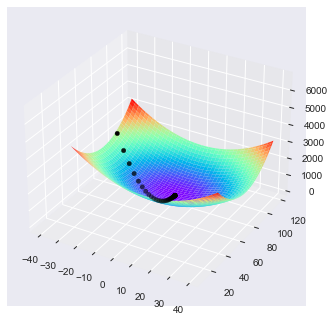

In [107]:
# Trajectory traced bt Theta Updates In The Loss Function
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1,J, cmap='rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1],error_list, color ='black')
plt.show()

C:\Users\pranj\AppData\Local\Temp\ipykernel_14060\1726293657.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')


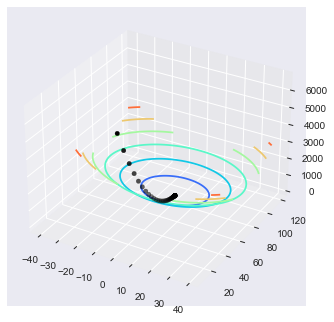

In [108]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1,J, cmap='rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1],error_list, color ='black')
plt.show()

In [111]:
#For making interactive plots 
np.save("ThetaList.npy", theta_list)